# **Name:Nirmal_Rawal**
# **Student_ID:2358113**

In [ ]:
import numpy as np
import tensorflow as tf
import gensim
import gensim.downloader as api

In [ ]:
print("NumPy:", np.__version__)  # Should show 1.24.0
print("TensorFlow:", tf.__version__)  # Should show 2.12.0
print("Gensim:", gensim.__version__)  # Should show 4.3.2
print("GPU Available:", tf.config.list_physical_devices('GPU'))

NumPy: 1.23.5
TensorFlow: 2.12.0
Gensim: 4.3.2
GPU Available: []


In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, SpatialDropout1D, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import gensim.downloader as api
import itertools
import random

In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Load dataset (replace with your file path)
df = pd.read_csv('/content/drive/MyDrive/assignment_for_ML/rrn_assignment /truevsfakenews.csv')

In [ ]:
df.head()

,text,label
0,WASHINGTON (Reuters) - The Republican and Demo...,true
1,Women should get as far away from Oklahoma as ...,fake
2,Another huge crowd of Americans tuned in last ...,fake
3,Donald Trump is desperate to stop the investig...,fake
4,"(Reuters) - Planned Parenthood, the U.S. medic...",true


In [ ]:
# Map labels to binary (0: FAKE, 1: TRUE)
df['label'] = df['label'].map({'fake': 0, 'true': 1})

In [ ]:
df.head(2)

,text,label
0,WASHINGTON (Reuters) - The Republican and Demo...,1
1,Women should get as far away from Oklahoma as ...,0


In [ ]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.sample(2)

,text,label
10798,WASHINGTON (Reuters) - Donald Trump’s campaign...,1
12387,If you want to watch a conservative throw a te...,0


In [ ]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
# Text cleaning function
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [ ]:
# Apply cleaning to all texts
df['cleaned_text'] = df['text'].apply(clean_text)

In [ ]:
df.sample(2)

,text,label,cleaned_text
15697,WASHINGTON (Reuters) - Democratic presidential...,1,washington reuters democratic presidential can...
10102,The man who wrote the speech for Patricia Smit...,0,man wrote speech patricia smith aka benghazi m...


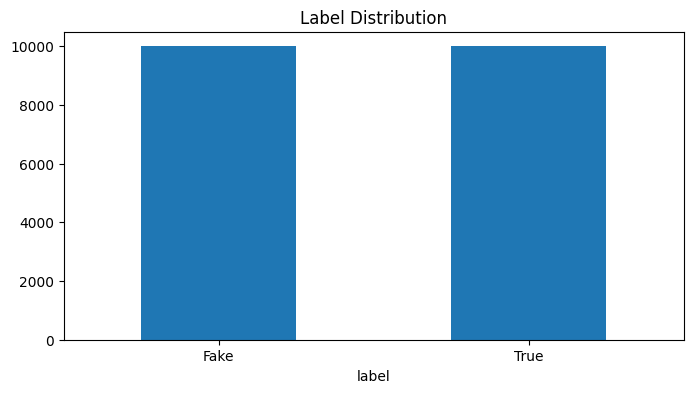

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [ ]:
# Plot label distribution
plt.figure(figsize=(8, 4))
df['label'].value_counts().plot(kind='bar')
plt.title("Label Distribution")
plt.xticks([0, 1], ['Fake', 'True'], rotation=0)
plt.show()
# Create word clouds
plt.figure(figsize=(15, 15))

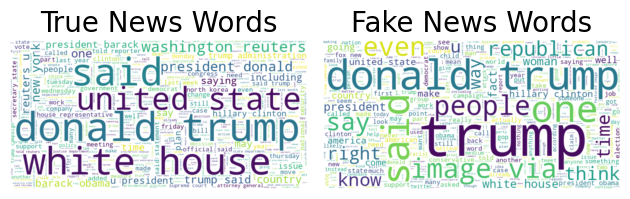

In [ ]:
# True news word cloud
plt.subplot(1, 2, 1)
true_words = " ".join(df[df['label'] == 1]['cleaned_text'])
wordcloud = WordCloud(max_words=500, width=800, height=400, background_color='white').generate(true_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("True News Words", fontsize=20)
plt.axis('off')

# Fake news word cloud
plt.subplot(1, 2, 2)
fake_words = " ".join(df[df['label'] == 0]['cleaned_text'])
wordcloud = WordCloud(max_words=500, width=800, height=400, background_color='white').generate(fake_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Fake News Words", fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Hyperparameters
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 200
EMBEDDING_DIM = 300
BATCH_SIZE = 64
EPOCHS = 10
VALIDATION_SPLIT = 0.2

In [ ]:
# Initialize tokenizer
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])

In [ ]:
# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])

In [ ]:
# Pad sequences
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
y = df['label'].values

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model 1: Simple RNN
print("\n=== Training Simple RNN Model ===")
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
rnn_model.add(SpatialDropout1D(0.2))
rnn_model.add(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(1, activation='sigmoid'))


=== Training Simple RNN Model ===


In [ ]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          36625200  
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 300)         0         
 ropout1D)                                                       
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               40100     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 36,665,401
Trainable params: 36,665,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rnn_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
rnn_history = rnn_model.fit(X_train, y_train,
                           batch_size=BATCH_SIZE,
                           epochs=EPOCHS,
                           validation_split=VALIDATION_SPLIT,
                           callbacks=[early_stopping])

Epoch 1/10
200/200 [==============================] - 211s 1s/step - loss: 0.6937 - accuracy: 0.5441 - val_loss: 0.6203 - val_accuracy: 0.6703
Epoch 2/10
200/200 [==============================] - 206s 1s/step - loss: 0.5659 - accuracy: 0.7031 - val_loss: 0.5440 - val_accuracy: 0.7647
Epoch 3/10
200/200 [==============================] - 203s 1s/step - loss: 0.4392 - accuracy: 0.8188 - val_loss: 0.6759 - val_accuracy: 0.5003
Epoch 4/10
200/200 [==============================] - 205s 1s/step - loss: 0.5588 - accuracy: 0.7191 - val_loss: 0.4916 - val_accuracy: 0.8019
Epoch 5/10
200/200 [==============================] - 207s 1s/step - loss: 0.3586 - accuracy: 0.8602 - val_loss: 0.3792 - val_accuracy: 0.8737
Epoch 6/10
200/200 [==============================] - 204s 1s/step - loss: 0.3564 - accuracy: 0.8630 - val_loss: 0.3743 - val_accuracy: 0.8581
Epoch 7/10
200/200 [==============================] - 206s 1s/step - loss: 0.2734 - accuracy: 0.8975 - val_loss: 0.3801 - val_accuracy: 0.8625

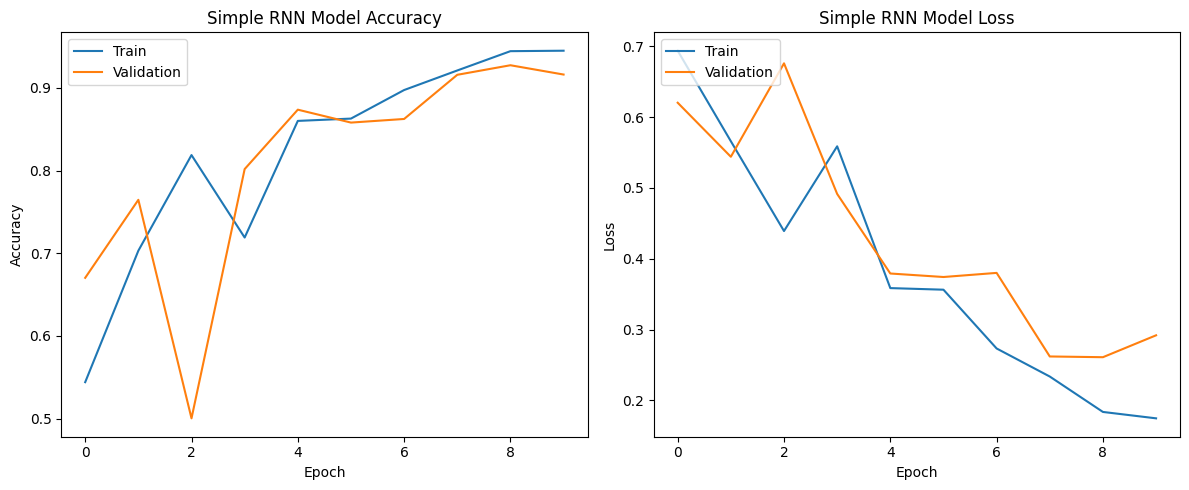

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'])
plt.plot(rnn_history.history['val_accuracy'])
plt.title('Simple RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'])
plt.plot(rnn_history.history['val_loss'])
plt.title('Simple RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Save the tokenizer
import pickle

# Save tokenizer
with open('/content/drive/MyDrive/assignment_for_ML/rrn_assignment /all_model/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the RNN model
rnn_model.save('/content/drive/MyDrive/assignment_for_ML/rrn_assignment /all_model/rnn_model.h5')

In [ ]:
# Define a prediction function
def predict_news(text):
    """
    Predicts whether a news article is fake (0) or true (1)

    Args:
        text (str): The news article text to classify

    Returns:
        dict: Prediction results with label and confidence
    """
    # 1. Clean the text
    cleaned_text = clean_text(text)

    # 2. Tokenize and pad the sequence
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH,
                                  padding='post', truncating='post')

    # 3. Make prediction
    prediction = rnn_model.predict(padded_sequence)

    # 4. Interpret and return results
    confidence = float(prediction[0][0])
    if confidence > 0.5:
        return {
            "label": "True",
            "confidence": confidence,
            "interpretation": f"The model predicts this is TRUE news with {confidence*100:.2f}% confidence"
        }
    else:
        return {
            "label": "Fake",
            "confidence": 1 - confidence,
            "interpretation": f"The model predicts this is FAKE news with {(1-confidence)*100:.2f}% confidence"
        }

# Example usage:
test_news = """
beirut reuters syrian rebel welcomed u missile attack syrian army airbase friday said washington responsibility end military action continue prevent syrian government using airbases banned weapon statement free syrian army alliance rebel group said welcomed raid base near homs city calling correct starting point confronting terrorism finding political solution war view responsibility united state
 still great stop operation statement said warning government ally could commit act revenge civilia
"""

result = predict_news(test_news)
print(result['interpretation'])

1/1 [==============================] - 0s 34ms/step
The model predicts this is TRUE news with 98.61% confidence


# **Model 2 using LSTM**

In [ ]:
import pickle

# Load the tokenizer
with open('/content/drive/MyDrive/assignment_for_ML/rrn_assignment /all_model/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)


In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index)+1,
                         output_dim=EMBEDDING_DIM,
                         input_length=MAX_SEQUENCE_LENGTH))
lstm_model.add(SpatialDropout1D(0.4))  # Increased dropout
lstm_model.add(Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)))  # Smaller LSTM
lstm_model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))  # L2 Reg

In [ ]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 300)          36625200  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 300)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              186880    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 36,812,209
Trainable params: 36,812,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Lower learning rate + early stopping
optimizer = Adam(learning_rate=1e-4, clipvalue=1.0)
lstm_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = lstm_model.fit(X_train, y_train,
                         batch_size=32,  # Smaller batch
                         epochs=5,
                         validation_split=VALIDATION_SPLIT,
                         callbacks=[early_stopping])

Epoch 1/5
400/400 [==============================] - 631s 2s/step - loss: 0.3688 - accuracy: 0.8658 - val_loss: 0.1120 - val_accuracy: 0.9759
Epoch 2/5
400/400 [==============================] - 633s 2s/step - loss: 0.0781 - accuracy: 0.9884 - val_loss: 0.0901 - val_accuracy: 0.9816
Epoch 3/5
400/400 [==============================] - 632s 2s/step - loss: 0.0514 - accuracy: 0.9959 - val_loss: 0.0632 - val_accuracy: 0.9887
Epoch 4/5
400/400 [==============================] - 620s 2s/step - loss: 0.0367 - accuracy: 0.9985 - val_loss: 0.0638 - val_accuracy: 0.9881
Epoch 5/5
400/400 [==============================] - 636s 2s/step - loss: 0.0292 - accuracy: 0.9995 - val_loss: 0.0626 - val_accuracy: 0.9862


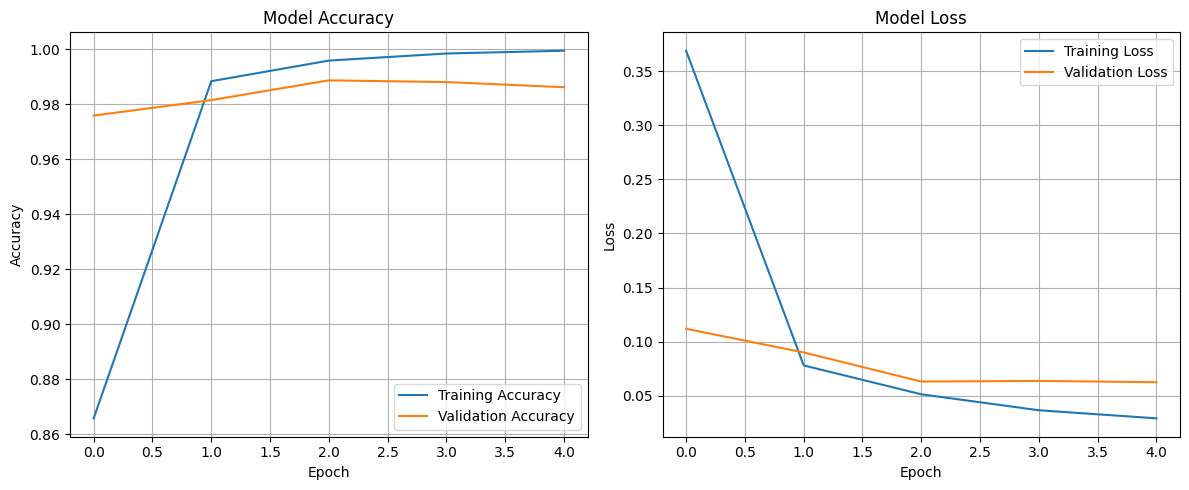

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
lstm_model.save('/content/drive/MyDrive/assignment_for_ML/rrn_assignment /all_model/lstm_model.h5')

# **Model 3: LSTM with Word2Vec**


In [ ]:
from gensim.models import KeyedVectors
import gensim.downloader as api

In [ ]:
  # Import required libraries
from gensim.models import KeyedVectors
import gensim.downloader as api
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load pre-trained Word2Vec embeddings
print("Loading Word2Vec embeddings...")
word2vec = api.load('word2vec-google-news-300')

Loading Word2Vec embeddings...
[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# Create embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, EMBEDDING_DIM))
for word, i in tokenizer.word_index.items():
    if word in word2vec:
        embedding_matrix[i] = word2vec[word]

In [ ]:
# Build model with pre-trained embeddings
lstm_w2v_model = Sequential()
lstm_w2v_model.add(Embedding(input_dim=len(tokenizer.word_index)+1,
                           output_dim=EMBEDDING_DIM,
                           weights=[embedding_matrix],
                           input_length=MAX_SEQUENCE_LENGTH,
                           trainable=False))
lstm_w2v_model.add(SpatialDropout1D(0.2))
lstm_w2v_model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
lstm_w2v_model.add(Dense(1, activation='sigmoid'))

lstm_w2v_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

In [ ]:
lstm_w2v_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 300)          36625200  
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 200, 300)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              320800    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 36,946,201
Trainable params: 321,001
Non-trainable params: 36,625,200
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lstm_w2v_history = lstm_w2v_model.fit(X_train, y_train,
                                     batch_size=BATCH_SIZE,
                                     epochs=3,
                                     validation_split=VALIDATION_SPLIT,
                                     callbacks=[early_stopping])

Epoch 1/3
200/200 [==============================] - 445s 2s/step - loss: 0.0837 - accuracy: 0.9684 - val_loss: 0.0161 - val_accuracy: 0.9953
Epoch 2/3
200/200 [==============================] - 440s 2s/step - loss: 0.0096 - accuracy: 0.9979 - val_loss: 0.0131 - val_accuracy: 0.9959
Epoch 3/3
200/200 [==============================] - 443s 2s/step - loss: 0.0086 - accuracy: 0.9980 - val_loss: 0.0187 - val_accuracy: 0.9956


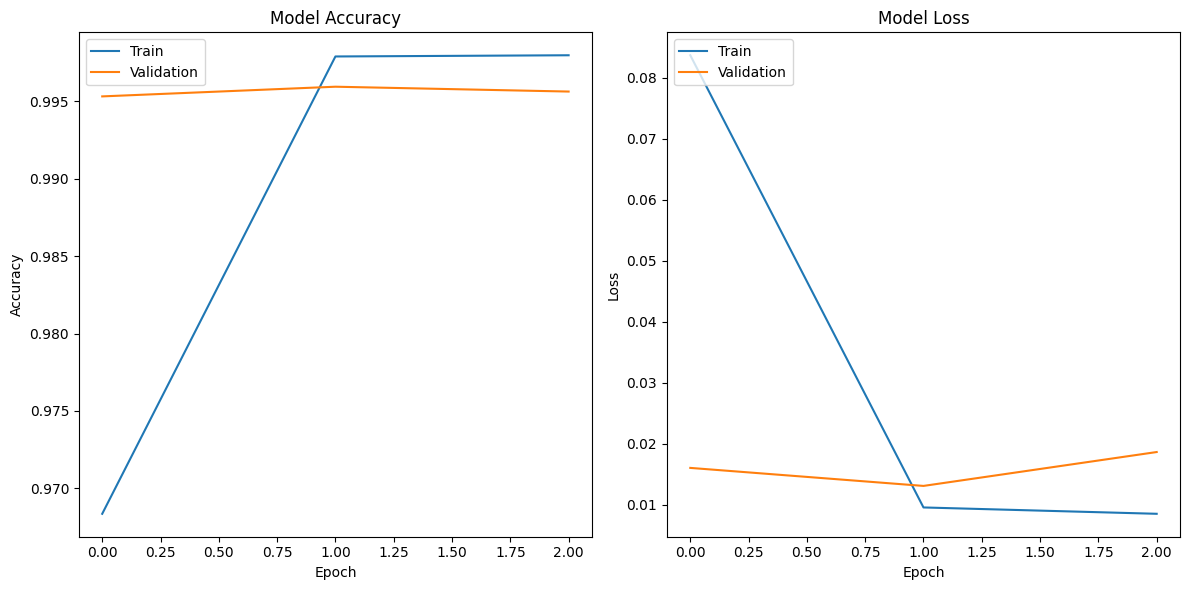

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(lstm_w2v_history.history['accuracy'])
plt.plot(lstm_w2v_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(lstm_w2v_history.history['loss'])
plt.plot(lstm_w2v_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
lstm_w2v_model.save("/content/drive/MyDrive/assignment_for_ML/rrn_assignment /all_model/lstm_w2v_model.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import SpatialDropout1D, SimpleRNN

# Custom SpatialDropout1D
class CustomSpatialDropout1D(SpatialDropout1D):
    def __init__(self, rate, **kwargs):
        kwargs.pop('trainable', None)
        kwargs.pop('noise_shape', None)
        kwargs.pop('seed', None)
        super().__init__(rate, **kwargs)

# Custom SimpleRNN to ignore 'time_major'
class CustomSimpleRNN(SimpleRNN):
    def __init__(self, units, **kwargs):
        kwargs.pop('time_major', None)
        super().__init__(units, **kwargs)

# Load RNN model
rnn_model = load_model(
    '/content/drive/MyDrive/assignment_for_ML/rrn_assignment /all_model/rnn_model.h5',
    custom_objects={
        'SpatialDropout1D': CustomSpatialDropout1D,
        'SimpleRNN': CustomSimpleRNN,
    }
)

# Load LSTM model (if available)
lstm_model = load_model(
    '/content/drive/MyDrive/assignment_for_ML/rrn_assignment /all_model/lstm_model.h5',
    custom_objects={
        'SpatialDropout1D': CustomSpatialDropout1D,
    }
)

# Load LSTM with Word2Vec model (if available)
lstm_w2v_model = load_model(
    '/content/drive/MyDrive/assignment_for_ML/rrn_assignment /all_model/lstm_w2v_model.h5',
    custom_objects={
        'SpatialDropout1D': CustomSpatialDropout1D,
    }
)

125/125 [==============================] - 4s 28ms/step

=== Simple RNN Evaluation ===

Classification Report:
              precision    recall  f1-score   support

        Fake       0.95      0.92      0.93      2022
        True       0.92      0.95      0.93      1978

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000

Accuracy: 0.9330


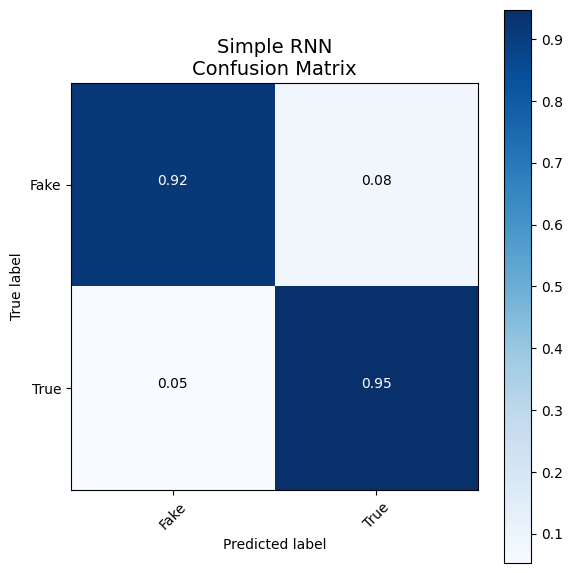

125/125 [==============================] - 16s 125ms/step

=== LSTM Evaluation ===

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      0.98      0.99      2022
        True       0.98      1.00      0.99      1978

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

Accuracy: 0.9888


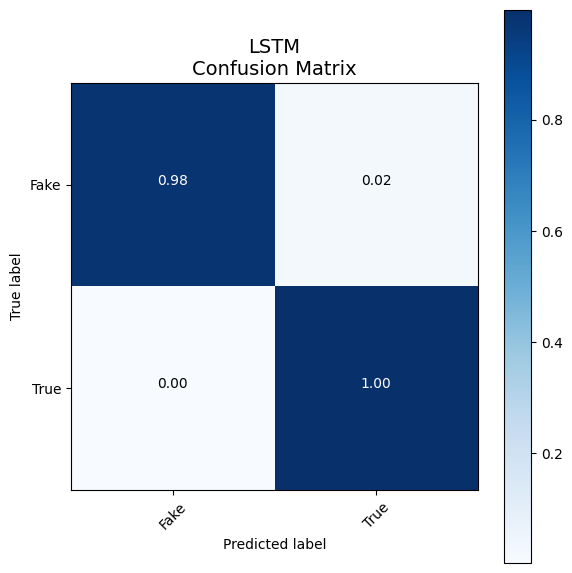

125/125 [==============================] - 24s 185ms/step

=== LSTM with Word2Vec Evaluation ===

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      2022
        True       1.00      1.00      1.00      1978

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Accuracy: 0.9975


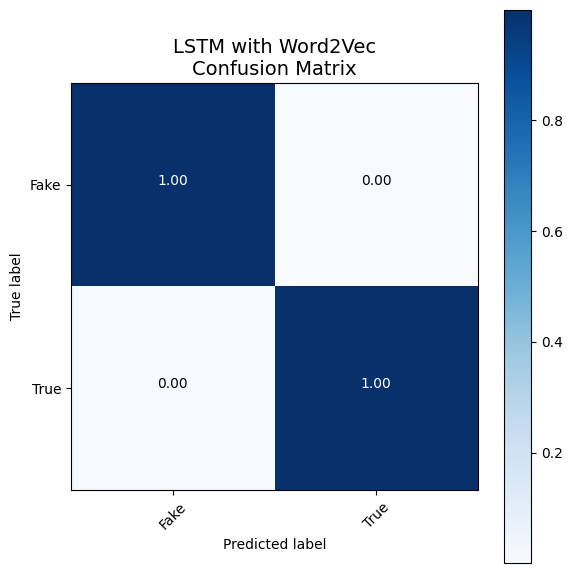

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    print(f"\n=== {model_name} Evaluation ===")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Fake', 'True']))

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{model_name}\nConfusion Matrix", fontsize=14)
    plt.colorbar()

    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Fake', 'True'], rotation=45)
    plt.yticks(tick_marks, ['Fake', 'True'])

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Evaluate all models
evaluate_model(rnn_model, X_test, y_test, "Simple RNN")
evaluate_model(lstm_model, X_test, y_test, "LSTM")
evaluate_model(lstm_w2v_model, X_test, y_test, "LSTM with Word2Vec")